In [3]:
from latools import *
from sympy import *
init_printing(use_latex=True)
from itertools import permutations
from math import prod

In this notebook we explore the combinatorial definition of determinant. This requires a little more programming than the previous notebooks, but it will help us getting a good grasp of the concept of a determinant.

Here is the definition of determinant of a $n\times n$ matrix $A$:
$$
\det(A)=\sum_{\sigma\in S_n}\text{sgn}(\sigma)a_{1,\sigma(a)}a_{2,\sigma(2)},\ldots,a_{n,\sigma(n)}
$$
where $S_n$ is the set of all permuations of the set $\{1,2,\ldots,n\}$. Recall that the _sign_ of a permutation $\sigma$ is:
$$
\text{sgn}(\sigma)=
\begin{cases}
1 &\text{if $\sigma$ contains an even number of inversions};\\
-1 &\text{if $\sigma$ contains an odd number of inversions}.
\end{cases}
$$

This formula leads to the following algorithmic description:

1. Enumerate all permutations of $S_n=\{1,2,\ldots,n\}$
2. For each permutation $\sigma$:

    a. Compute the sign of $\sigma$
    
    b. Compute the product $a_{1,\sigma(a)}a_{2,\sigma(2)},\ldots,a_{n,\sigma(n)}$

3. Add all the products multiplied by the corresponding sign

_Note_: One important detail is that sequence types in Python start at the index 0, so we must adjust the notation above. Following the Python convention, the products in the determinant must be written as:
$$
\text{sgn}(\sigma)a_{0,\sigma(0)}a_{1,\sigma(1)},\ldots,a_{n-1,\sigma(n-1)}
$$
where $\sigma$ is a permutation of $\{0,1,\ldots,n-1\}$

In the next sections we break down the code in several steps

# Permutations

The Python standard library contains a function `permutations` that enumerates all permutations of a set. To generate all permutations of the set $\{0,1,\ldots,n-1\}$, we can use the following code:

In [16]:
n = 3
for sigma in permutations(range(n)):
    print(sigma)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


Notice that indexes start at zero in python sequence types.

Now we need to compute the sign of a permutation. We do this by keeping to indexes $i$ and $j$, with $i<j$. Whenever $\sigma_i>\sigma_j$, we flip a variable the records the sign of the permutation. The cell below illustrates the code:

In [19]:
sigma = (1, 0, 2, 3)
n = len(sigma)
sign = 1
for i in range(n-1):
    for j in range(i+1, n):
        if sigma[i] > sigma[j]:
            sign = -sign
print(sign)

-1


In the code above we use two nested `for` loops to iterate over the indexes. Then we compare the values of `sigma[i]` and `sigma[j]` and change the variable `sign` accordingly.

## Exercise

To check the correctness of our code, let's compute the signs of all permutations of a given order.

1. Complete the cell below with the code necessary to compute the sign of each permutation. Then, check if the signs are being correctly computed.

2. Repeat the exercise for $n=5$. (It is not necessary to check correctness of the sign for all permutations, just verify correctness of a subset of permutations.

In [ ]:
n = 5
for sigma in permutations(range(n)):
    # Include code to compute the sign of sigma
    print(sigma, sign)

In [ ]:
# Write code here to compute the signs of permutations of order 5.

For convenience, we want to define a function that computes the sign of a permutation. The cell below wraps the code in a function definition.

In [32]:
def sign(sigma):
    s = 1
    n = len(sigma)
    for i in range(n-1):
        for j in range(i+1, n):
            if sigma[i] > sigma[j]:
                s = -s
    return s

## Exercise

Repeat the previous exercise using the function `sign` defined above.

# Computing the determinant

We are now ready to compute determinants. One last Python command we need is `prod`, which computes the product of a sequence. `prod` is part of the `math` module, which is part of the standard library

_Note_: there also is a `prod` function in the `sympy` module, which one we use, in this case, is not important.

Here is an example of use of `prod`:

In [33]:
prod([1,2,3,4,5])

The cells below shows how to compute the product associated to a permutation, that is, how to compute
$$
\text{sgn}(\sigma) a_{0,\sigma(0)}a_{1,\sigma(1)}\cdots a_{n-1,\sigma(n-1)}
$$

Start by defining a matrix and a specific permutation:

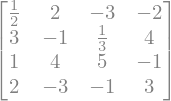

In [34]:
A = rational_matrix([[1/2,  2, -3, -2],
                     [3, -1, 1/3, 4],
                     [1,  4, 5, -1],
                     [2, -3, -1, 3]])
A

In [35]:
sigma = (3,0,1,2)
sigma

For this example, we have:
$$
\text{sgn}(\sigma)  =
(-1)1\cdot a_{0,\sigma(0)}a_{1,\sigma(1)}\cdots a_{n-1,\sigma(n-1)}=
(-1)\cdot(-2)\cdot 3\cdot 4\cdot(-1)=-24
$$

Here is the product computation in Python. The expression `A.rows` returns the number of rows of matrix `A`:

In [46]:
n = A.rows
prod((A[i,sigma[i]] for i in range(n)), start=sign(sigma))

We can now compute the determinant, which is a "sum of products":

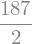

In [51]:
n = A.rows
Adet = sum(prod((A[i,sigma[i]] for i in range(n)), start=sign(sigma)) 
           for sigma in permutations(range(n)))
Adet

## Exercises

1. Use the code above to compute the determinant of the matrix
$$
B=\begin{bmatrix}
2&-1&3\\0&4&-2\\1&1&5
\end{bmatrix}
$$

2. Define a function `determinant` that computes the determinant of a square matrix $A$. Here is a skeleton of the code:
```python
def determinant(A):
    # Write your code here
    return Adet
```

Test your code with at least 3 matrices, with diferent sizes.

3. Our code can also be used to compute symbolic determinants. For $3\times3$ matrices we can use the following code to create a generic matrix:
```python
n = 3
A = Matrix([symbols(','.join(['a_{i+1}{j+1}' for j in range(n)])) 
            for i in range(n)])
```

Use the `determinant` function you defined above to compute the determinant of a generic $3\times3$ matrix $A$. Then, repeat the exercise with $4\times4$ matrices.

4. We can use our code to verify the properties of the determinant. Define a generic $3\times3$ generic matrix and use it to verify the following properties of the determinant:

    a. Swapping two rows/columns changes the sign of the determinant.
    
    b. Multiplying a row/column by a scalar multiplies the determinant by the same scalar.
    
    c. Adding the product of a row by a scalar to another row does not change the determinant.

5. Using generic symbolic matrices, verify that $\det(AB)=\det(A)\det(B)$ for $3\times3$ matrices.

6. A famous formula that appears in problems related to polynomial interpolation is the *Vandermonde determinant*:

$$
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{n-1}\\
1 & x_2 & x_2^2 & \cdots & x_2^{n-1}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_n & x_n^2 &\cdots & x_n^{n-1}
\end{bmatrix}
=
\prod_{1\le i < j \le n}(x_j-x_i)
$$

Use the `determinant` function you defined above to verify this formula for $3\times3$ matrices. You can use the following code to create a generic Vandermonde matrix:

```python
xvars = symbols(','.join(f'x_{i+1}' for i in range(n)))
A = Matrix([ [xvars[i]**j for j in range(n)] for i in range(n)])
```

*Optional*: Do the same for $4\times4$ matrices